# Ejercicio 1
# Normas matriciales.
Se quiere estimar la norma 2 de una matriz $A \in \mathbb{R}^{3x3}$ como el máximo del valor $\frac{∥Ax∥_2}{∥x∥_2}$ entre varios vectores $x\in\mathbb{R}^3$ no nulos generadosal azar. Hacer un programa que reciba una matriz A y luego:

* genere los primeros 100 términos de la siguiente sucesión:
\begin{equation}
s1 = 0, sk+1 = max \{sk, \frac{∥Ax_k∥_2}{∥x_k∥_2}\}
\end{equation}
donde los $x_k\in\mathbb{R}^3$ son vectores no nulos generados al azar en la bola unitaria:
$B = {x : ∥x∥_2 ≤ 1}$.

* Grafique la sucesión calculada, junto con el valor exacto de la norma de la matriz.

Recordar que la norma 2 de un vector v puede calcularse con el comando `np.linalg.norm(v)`, mientras que la norma 2 de una matriz A se puede obtener con `np.linalg.norm(A,2)`. Tener en cuenta que los vectores generados al azar (comando `np.random.random`) tienen coordenadas en el intervalo [0, 1] y por lo tanto abarcan sólo el primer octante en $\mathbb{R}^3$

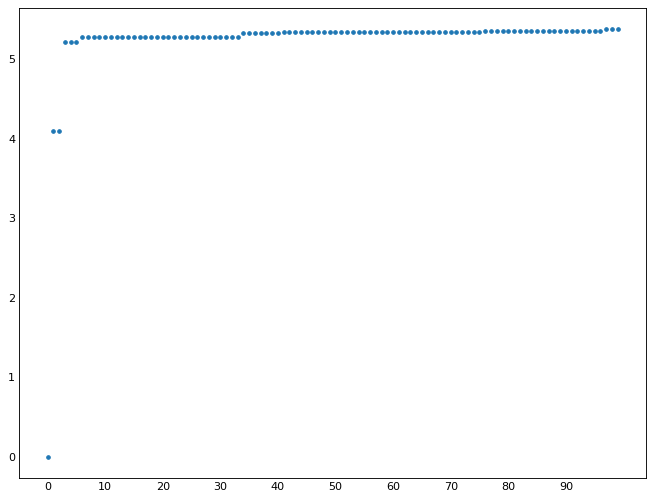

In [ ]:
"""
Lo primero es importar las librerias que necesitaremos
numnpy para el trabajo matematico
matplotlib.pyplot para los graficos
"""

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('_mpl-gallery')

#lo primero es armar la matriz A, para ello configuramos sus filas de largo 3
fila1: list[int] = [1,2,3]
fila2: list[int] = [1,1,3]
fila3: list[int] = [1,2,1]

#y armamos la matriz utilizando np.array()

matriz: list[list[int]] = np.array([fila1,fila2,fila3])

#como vamos a armar una sucesion de valores, vamos a utilizar un ciclo for, para ello vamos a inicializar
#la variable donde vamos a guardar los valores de la sucesion s y tambien crear variable n una con el valor de
#cuantos terminos debe tener la sucesion, que en este caso es 100

n: int = 100
s: list[int] = [0]*n
#la variable s estan incializada con 0 para agilizar el guardado de datos de pyhton, esta manera de escribir crea n veces el valor indicado en la lista
#recomendacion, probar que pasa si hacen [1,2]*10

#una vez inicializado los variables necesarias para nuestro ciclo for, vamos a empezar a trabajar con el

for i in range(1,n): #inicio desde el termino 1 de la sucesion porque el primero es 0
    xk: list[float] = np.random.random(3) #genero mi vector random, para indicar la dimension del vector se lo paso como parametro
    Axk: list[float] = matriz @ xk #hago el producto vectorial de A*xk
    norm_2_xk: float = np.linalg.norm(xk,2) #calculo la norma del vecto xk
    norm_2_Axk: float = np.linalg.norm(Axk,2) #calculo la norma de A*^xk
    s[i] = max([s[i-1],norm_2_Axk/norm_2_xk]) #agrego al termino i+1 el valor maximo entre el termino i y el calculo

#con la sucesion calculada, hagamos los graficos, para ello usamos matplotlib

fig, ax = plt.subplots(figsize=(8, 6), dpi=80) #incializo el grafico con subplots, sirve para cuando quiero crear varios graficos en una misma imagen
ax.grid() #agrego grillas
ax.scatter(x= range(0,100), y= s, s=10) #la paso los datos, al pasarle una sola lista, en el eje x pondra el valor del termino de la sucesion y en el y el valor de la sucesion
ax.set_xticks(np.arange(0, 100, 10))

plt.show()

# Ejercicio 2

## Resolución de ecuaciones.

(a) Escribir un programa que implemente el método de Jacobi para la resolución
de un sistema lineal Ax = b, con las siguientes condiciones:
* que al inicio calcule el radio espectral del método y que termine si es mayor
o igual a 1,
* que finalice si el método se estaciona,
* que finalice si se excede cierto tope de iteraciones.

(b) Testear el programa desarrollado en el item anterior para los sistemas

\begin{equation*}
\begin{pmatrix}
3 & 1 & 1 \\
2 & 6 & 1 \\
1 & 1 & 4
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2\\
x_3
\end{pmatrix}
 =
\begin{pmatrix}
5\\
9\\
6
\end{pmatrix}
\end{equation*}

\begin{equation*}
\begin{pmatrix}
5 & 7 & 6 & 5\\
7 & 10 & 8 & 7\\
6 & 8 & 10 & 9\\
5 & 7 & 9 &10
\end{pmatrix}
\begin{pmatrix}
x1\\
x2\\
x3\\
x4
\end{pmatrix}
 =
\begin{pmatrix}
23\\
32\\
33\\
31
\end{pmatrix}
\end{equation*}
y analizar los resultados.


## Resolucion a)
Lo primero es recordar en que consiste el metodo de Jacobi. Este metodo es una forma iteractiva de resolver ecuaciones de la forma $Ax = b$. Donde A es una matriz, x son las incognitas del sitema y b un vector.

Para este metodo se descompone la matriz $A$ de la siguiente manera $$A = D + R$$ donde $D$ es la matriz de la diaognal de $A$ y $R = A - D$. Luego $Ax = b ⟺ (D+R)x = b$ Luego si despejamos la "x" nos queda que

$$x = D^{-1}(b - Rx)$$

Luego podemos armar el metodo iteractivo de la forma:

$$x^{k+1} = D^{-1}(b - Rx^{k}) = D^{-1}b - (D^{-1}R)x^{k}$$

Para todo k>0 y x⁰ es un vector aproximado a la solucion.

Luego para que el metodo converga, es necesario que lo haga  $(D^{-1}R)x^{k}$ luego esto pasa Sii

$$ρ(D^{-1}R)<1$$

Ademas como parametro de control vamos a definir el vector resto $r$ como
$$r^{k+1} = b - A*x^{k} $$

Y por otro lado vamos a comparar el estancamiento

In [31]:
import numpy as np

#Lo primero es descomponer la matriz de la manera que necesitamos, es decir A = D + R
def descomposicionDR(matriz):
    n,m = matriz.shape
    R = matriz.copy()
    D = matriz.copy()
    for i in range(n):
        for j in range(m):
            if i != j :
                D[i,j] = 0
    R = R - D
    return D,R

#Luego calculamos para todas las matrices, la matriz del metodo J = D^-1*R
def matrizJacobi(matriz):
    D,R = descomposicionDR(matriz)
    invD = np.linalg.inv(D)
    jacobi = invD @ R
    return jacobi
    
#Generamos una funcion que calcula el radio espectral del metodo
def radioEspectralDelMetodo(matriz):
    metodo = matrizJacobi(matriz)
    aval = np.linalg.eigvals(metodo)
    absaval = abs(aval)
    rho =  max(absaval)
    return rho

#Calculamos el metodo, pasamos los paramateros matriz A, el vector b, una aproximacion del x0, y como parametros opcionales 
#e como el error de aproximacion y n como la cantidad de iteraciones
def jacobi(matriz,b,x0,e=1e-5,n=1000):
    res = 0
    radioEspectral = radioEspectralDelMetodo(matriz)
    A = matriz.copy()
    if radioEspectral < 1: 
        sucesion = [x0]
        jacobi = matrizJacobi(A)
        D, _ = descomposicionDR(matriz)
        invD = np.linalg.inv(D)
        i = 1
        resto = np.linalg.norm(b - A @ sucesion[i-1],2)
        while i < n and resto >= e :
            xi = invD @ b - jacobi @ sucesion[i-1]
            sucesion.append(xi)
            i = i + 1
            resto = np.linalg.norm(b - A @ sucesion[i-1],2)
            if resto < e:
                res = print(f"La solucion del metodo es x = {sucesion[-1]}")
            if i+1 > n:
                res = print(f"El metodo excedio el numero de iteracciones \n x = {sucesion[-1]}")
    else:
        res = print(f"La matriz del metodo tiene radio espectral mayor a 1"'\n'"No converge con este metodo" '\n'f"x = {x0}")
    return res

matriz = np.array([[3,1,1],
                   [2,6,1],
                   [1,1,4]]
)
b = np.array([5,9,6])
x0 = np.array([0.5,0.5,0.5])

jacobi(matriz,b,x0,e=1e-4,n=500)

matriz = np.array([[5,6,7,5 ],
                   [6,10,8,7],
                   [7,8,10,9],
                   [5,7,9,10]]
)
b = np.array([23,32,33,31])
x0 = np.array([0.5,0.5,0.5,0.5])

jacobi(matriz,b,x0,e=1e-4,n=500)

La solucion del metodo es x = [1.00000846 1.00000715 1.000007  ]
La matriz del metodo tiene radio espectral mayor a 1
No converge con este metodo
x = [0.5 0.5 0.5 0.5]


# Ejercicio 2
## Resolución de ecuaciones.
(a) Implementar un programa que reciba como input una función f, su derivada

′
, un punto inicial x0, una tolerancia ε y un entero N y aplique el método de
Newton-Raphson para buscar una raíz de f a partir de x0. El programa debe
finalizar cuando |xn − xn−1| < ε o cuando llega al paso N. Si no se alcanza la
convergencia luego de N pasos, imprimir un mensaje de error
 

## resolucion

Para resolver este ejercicio, necesitamos recordar el metodo de Newton-Rhapson, este metodo permite encontrar raices de las funciones $f:[a,b] \rightarrow \mathbb{R}$ tal que $f$ sea derivable, el metodo queda en que:

\begin{equation*}
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
\end{equation*}

luego es necesrio que $f'(x_n)$ no se anule en $[a,b]$


In [53]:
#para este ejercicio, no utilizaremos ninguna lbreria
#empezamos inicializando las variables que utilizaremos

N = 100 #la cantidad de iteracciones del programa
eps = 0.0001 #el error del metodo esperado
x0 = 1 #el valor de x0 donde inciamos el metodo

#para definir las funciones que buscaremos las raices utilizaremos las lambda function, que son mas sencillas de escribir

f = lambda x : x**15 - 2  #definimos f
df = lambda x : 15*x**14 # definimos f'

anterior = x0
res = anterior - f(anterior) / df(anterior)
i = 1 #inicializamos el contador
resto = abs(res - anterior)

while i < N and abs(resto) > eps: #inciamos el ciclo con la condicion del conteo y del error
    anterior = res
    res = anterior - f(anterior) / df(anterior) #calculamos el siguiente paso
    resto = abs(res - anterior)
    i = i + 1

#genemos el mensaje de error segun la razon de porque termino el ciclo
#si excedio el numero de iteracciones o si no
if i > N and abs(resto) >= eps:
    print("Error, se excedio el numero de iteraacciones, posiblemente el metodo no converga para x0")
else:
    print(f"La raiz mas cercana de x0 = {x0} de f(x) es r = {res}")






La raiz mas cercana de x0 = 1 de f(x) es r = 1.0472941306927679


# Ejercicio 4
## Ecuaciones diferenciales. 
Escribir un programa que implemente el método de Euler explícito para aproximar numéricamente la solución $x(t)$ de la siguiente ecuación diferencial en el intervalo 
$[t0, tF ]$:
\begin{equation*}
\begin{dcases}
\dot{x}(t) = f(t, x(t))\\
x(t0) = x0
\end{dcases}
\end{equation*}
¿Qué parámetros debe recibir y qué información debe devolver este programa para
que la aproximación obtenida pueda graficarse?

El metodo de Euler consiste en dividir en N+1 pasos el intervaloe $[t_0,t_f]$, para eso calculamos el paso $h$ con la formula
$$h = \frac{t_f-t_0}{N}$$
luego el intervalo que tenemos es el dado por $(t0,t1 = t0+h,t0+2h,...,t0+N*h = tf)$
Luego la condicion inicial nos da el punto $P_0 = (t_0,x_0)$, punto por donde pasa la solucion a $t_0$, luego 
$$\left.\dot{x}(t) \right|_{P_0} =\left. \frac{dx}{dt}\right|_{P_0} = f(t_0, x_0) $$
Luego tomando la recta tangente para el punto $P_0$ tengo que
$$\left. \frac{dx}{dt}\right|_{P_0} = \frac{x_1 - x_0}{t_1 - t_0} = f(t_0, x_0)$$
despejando x1:
$$x_1 = x_0 - (t_1-t_0)f(t_0,x_0) \underset{t_1-t_0 = h}{=} x_0 - hf(t_0,x0) $$
luego inductivamente tenemos que el metodo queda como
\begin{equation*}
\begin{dcases}
x_{n+1} = x_n + h*f(t_n,x_n)\\
x(t0) = x0\\
h = \frac{t_f-t_0}{N}\\
t_i \in [t_0,t_0 + h,..., t_0 + (n-1)h, t_f]
\end{dcases}
\end{equation*}
Por ultimo, para poder graficar el metodo es necesario devolver el vector de los tiempos T = $[t_0,t_0 + h,..., t_0 + (n-1)h, t_f]$ y las soluciones X = $[x_0,x_1,..., x_f]$


In [8]:
#Let's do it, este es divertido
#Como siempre empezamos importando las librerias, en este caso, unicamente numpy

import numpy as np

#en este caso el metodo estara totalmente en una funcion

def metodoEuler(f,t_0,t_f,x_0,N):
    T = np.linspace(t_0,t_f,N+1) #armamaos el array para los tiempos
    h = (t_f - t_0)/N
    X = 0*T #armamos el array de la solucion
    X[0] = [x_0] #iniciliamos el arrat de la solucion con x(t_0) = x_0
    #ahora vamos a calcular los N pasos siguientes
    for i in range(0,N):
        X[i+1] = X[i] + h*f(T[i],X[i]) #actualizamos la posicion i-esima
    return (T,X)

# Ejercicio 5. 
## Ecuaciones diferenciales. 
Se quiere verificar numéricamente el orden de convergencia de los métodos de Euler y Taylor de orden 2. Para ello: resolver numéricamente el problema:
\begin{equation*}
\begin{dcases}
\dot{x}(t) = x(t)\\
x(t0) = 1
\end{dcases}
\end{equation*}

en el intervalo [0, 1] con ambos métodos, tomando h = 0.1, 0.05, 0.01, 0.005, 0.001 y 0.0005.
Obtener la solución exacta y para cada h, calcular el error que se comete al aproximar
$x(1): E_N = |x(1) −xN |$ . Graficar $log(E_N)$ en función de $log(h)$. ¿Qué se espera
ver? ¿El resultado es consistente con el esperado?

## Euler

El metodo de Euler consiste en dividir en N+1 pasos el intervaloe $[t_0,t_f]$, para eso calculamos el paso $h$ con la formula
$$h = \frac{t_f-t_0}{N}$$
luego el intervalo que tenemos es el dado por $(t0,t1 = t0+h,t0+2h,...,t0+N*h = tf)$
Luego la condicion inicial nos da el punto $P_0 = (t_0,x_0)$, punto por donde pasa la solucion a $t_0$, luego 
$$\left.\dot{x}(t) \right|_{P_0} =\left. \frac{dx}{dt}\right|_{P_0} = f(t_0, x_0) $$
Luego tomando la recta tangente para el punto $P_0$ tengo que
$$\left. \frac{dx}{dt}\right|_{P_0} = \frac{x_1 - x_0}{t_1 - t_0} = f(t_0, x_0)$$
despejando x1:
$$x_1 = x_0 - (t_1-t_0)f(t_0,x_0) \underset{t_1-t_0 = h}{=} x_0 - hf(t_0,x0) $$
luego inductivamente tenemos que el metodo queda como
\begin{equation*}
\begin{dcases}
x_{n+1} = x_n + h*f(t_n,x_n)\\
x(t0) = x0\\
h = \frac{t_f-t_0}{N}\\
t_i \in [t_0,t_0 + h,..., t_0 + (n-1)h, t_f]
\end{dcases}
\end{equation*}
Por ultimo, para poder graficar el metodo es necesario devolver el vector de los tiempos T = $[t_0,t_0 + h,..., t_0 + (n-1)h, t_f]$ y las soluciones X = $[x_0,x_1,..., x_f]$

## Taylor

El metodo de taylor varia en la forma de la que se consigue la aproximacion del Teorema de Taylor, como es de orden 1, basta con un taylor de orden 2 para adelante

$$x(t+h) \approx x(t) + hx'(t) + \frac{h^2}{2}x''(t) +\frac{h^2}{6}{x'''(\zeta)}  $$

donde $\zeta$ es un valor entre $[t,t+h]$

luego discretizando tomando que $t_i = t_0 + ih$, para $i \in [0,..,N]$ y $h = \frac{t_f-t_0}{N} $ se llega a que 
$$x(t_{i+1}) = x(t_{i}) + hx'(t_{i}) + \frac{h^2}{2}x''(t_{i})  $$


luego las funciones de actualizacion de ambos metodos para el caso del ejercicio son

### Euler
$$x(t_{i+1}) = x({t_i}) + hx({t_i})$$

###Taylor
como $x'(t) = x(t)$, tengo que calcular $x''(t)$ que es: $x''(t) = (x'(t))' = (x(t))' = x'(t) = x(t)$, luego reemplazando queda como:

$$x(t_{i+1}) = x(t_{i}) + hx(t_{i}) + \frac{h^2}{2}x(t_{i})$$

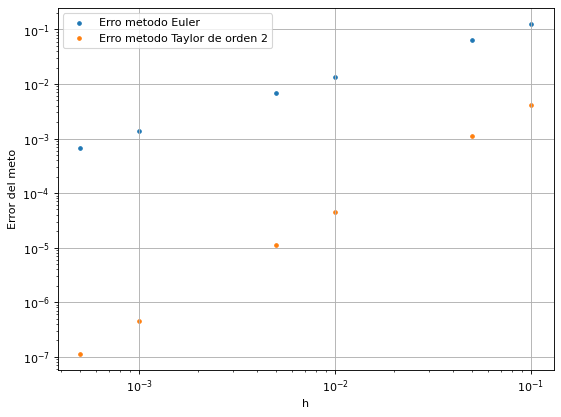

In [16]:
#Let's do it, este es divertido
#Como siempre empezamos importando las librerias, en este caso, numpy y matplotlib

import numpy as np
import matplotlib.pyplot as plt

#en este caso el metodo estara totalmente en una funcion y sera particular para este ejercicio

def metodoEuler(t_0,t_f,x_0,h):
    N = int((t_f - t_0)/h)
    T = np.linspace(t_0,t_f,N+1) #armamaos el array para los tiempos
    X = 0*T #armamos el array de la solucion
    X[0] = x_0 #iniciliamos el arrat de la solucion con x(t_0) = x_0
    #ahora vamos a calcular los N pasos siguientes
    for i in range(0,N):
        X[i+1] = X[i] + h*X[i] #actualizamos la posicion i-esima
    return (T,X)

def metodoTaylorO2(t_0,t_f,x_0,h):
    N = int((t_f - t_0)/h)
    T = np.linspace(t_0,t_f,N+1) #armamaos el array para los tiempos
    X = 0*T #armamos el array de la solucion
    X[0] = x_0 #iniciliamos el arrat de la solucion con x(t_0) = x_0
    #ahora vamos a calcular los N pasos siguientes
    for i in range(0,N):
        X[i+1] = X[i] + h*X[i] + (h**2)/2*X[i] #actualizamos la posicion i-esima
    return (T,X)

#calculamos los casos de la funcion

t_0 = 0
t_f = 1
x_0 = 1
h = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005]
x_f_euler = [0]*len(h)
x_f_taylor = [0]*len(h)

#calculamos para cada caso
for i in range(len(h)):
    TE,XE = metodoEuler(t_0,t_f,x_0,h[i])
    TT,XT = metodoTaylorO2(t_0,t_f,x_0,h[i])
    x_f_euler[i] = XE[-1]
    x_f_taylor[i] = XT[-1]
    
x_f = np.e #calculamos el valor exacto de la edo x'(t) = x(t) que es x(t) = x_0*e^t

#calculamos los errores de cada metodoEuler

error_euler = [0]*len(h)
error_taylor = [0]*len(h)

for i in range(len(h)):
    error_euler[i] = abs(x_f - x_f_euler[i])
    error_taylor[i] = abs(x_f - x_f_taylor[i])

#ahora los grafico
   
fig, ax = plt.subplots(figsize=(8, 6), dpi=80) #incializo el grafico con subplots, sirve para cuando quiero crear varios graficos en una misma imagen
ax.grid() #agrego grillas
ax.scatter(x= h, y=error_euler , s=10, label = "Erro metodo Euler") 
ax.scatter(x= h, y=error_taylor , s=10, label = "Erro metodo Taylor de orden 2")
ax.legend()
ax.set_xlabel("h")
ax.set_ylabel("Error del meto")
ax.set_xscale("log")
ax.set_yscale("log")
plt.show()

#podemos ver como el metodo de taylor tiene una mejor convergencia para la funcion, ademas la diferncia entre estos, se corresponde con al orden de convergencia del metodo